# CMSE 202 Final Project

#### Group Members: Brady, Toan, Sophie, Sultan, and Andy
#### November 17th, 2024

## *How Treasury Yields Predict Economic Recessions*

## Background & Motivations

Our group’s interest in financial markets and personal finance has inspired us to explore indicators that might help predict economic downturns. One question that consistently arises among investors and analysts is whether certain financial metrics, like Treasury yields, can offer early signals of an impending recession. Treasury yields, particularly the spread between long-term and short-term yields, have historically been used as potential recession indicators. By understanding more about the behavior of these yields, we aim to uncover insights that could be valuable not only for investors but also for anyone interested in the broader economy.

This project is especially relevant in today’s unpredictable financial climate, where understanding potential recession signals can aid in making informed financial decisions. Through our analysis, we hope to contribute to the ongoing discussion around yield metrics and their significance in economic forecasting.

## Part 1: Data Collection and Cleaning

Package importing for the entirety of the project

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

We started our project by collecting data from the US Government. Most of the historical information we needed was contained on federal platforms. We collected several different yield trends for different maturity dates as well as US GDP data. All of this information was listed in csv files.

In [30]:
yr1 = pd.read_csv('data/DGS1.csv')
yr10 = pd.read_csv('data/DGS10.csv')
mo1 = pd.read_csv('data/DGS1MO.csv')
yr20 = pd.read_csv('data/DGS20.csv')
yr30 = pd.read_csv('data/DGS30.csv')
mo3 = pd.read_csv('data/DGS3MO.csv')
mo6 = pd.read_csv('data/DGS6MO.csv')
yr1.head()

,DATE,DGS1
0,1965-11-01,4.350
1,1965-11-02,.
2,1965-11-03,4.360
3,1965-11-04,4.380
4,1965-11-05,4.380


We quickly noticed that the yield data tracked back to different years. We realized that trimmed data that was all on the same timeline was crucial for proper analysis. The one-month yield started at the most recent date, having its first full year starting in 2002. Also, the data contain missing values, which need to be cleaned before further analysis

In [31]:
# Function to clean datasets
def clean_dataset(df, target_column):
    # Filter by date
    df = df[df['DATE'] >= '2002-01-01'].copy()  
    
    # Convert the 'DATE' column to DateTime format 
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    
    # Replace '.' with NaN
    df.loc[:, target_column] = df[target_column].replace('.', np.nan)
    
    # Convert the column to numeric
    df.loc[:, target_column] = pd.to_numeric(df[target_column], errors='coerce')
    
    # Drop NaN values
    df.dropna(subset=[target_column], inplace=True)
    
    return df

# Clean each dataset 
yr1 = clean_dataset(yr1, 'DGS1')
yr10 = clean_dataset(yr10, 'DGS10')
mo1 = clean_dataset(mo1, 'DGS1MO')
yr20 = clean_dataset(yr20, 'DGS20')
yr30 = clean_dataset(yr30, 'DGS30')
mo3 = clean_dataset(mo3, 'DGS3MO')
mo6 = clean_dataset(mo6, 'DGS6MO')

yr1

,DATE,DGS1
9437,2002-01-02,2.28
9438,2002-01-03,2.24
9439,2002-01-04,2.25
9440,2002-01-07,2.19
9441,2002-01-08,2.19
...,...,...
15388,2024-10-24,4.25
15389,2024-10-25,4.29
15390,2024-10-28,4.28
15391,2024-10-29,4.29


Quarterly GDP data was necessary as a "recession" occurs after two consecutive quarters of gdp drops.

In [32]:
gdp_data = pd.read_csv('data/GDP.csv')
gdp_data = clean_dataset(gdp_data, 'GDP')
# Shift the GDP data forward by 1 day
gdp_data['DATE'] = gdp_data['DATE'] - pd.Timedelta(days=1)
gdp_data = gdp_data.drop(gdp_data.index[0])
gdp_data

,DATE,GDP
9,2002-03-31,10887.460
10,2002-06-30,10984.040
11,2002-09-30,11061.433
12,2002-12-31,11174.129
13,2003-03-31,11312.766
...,...,...
94,2023-06-30,27967.697
95,2023-09-30,28296.967
96,2023-12-31,28624.069
97,2024-03-31,29016.714


## Part 2: Data Visualization and Analysis

Plot of all monthly yield averages starting from 2002:

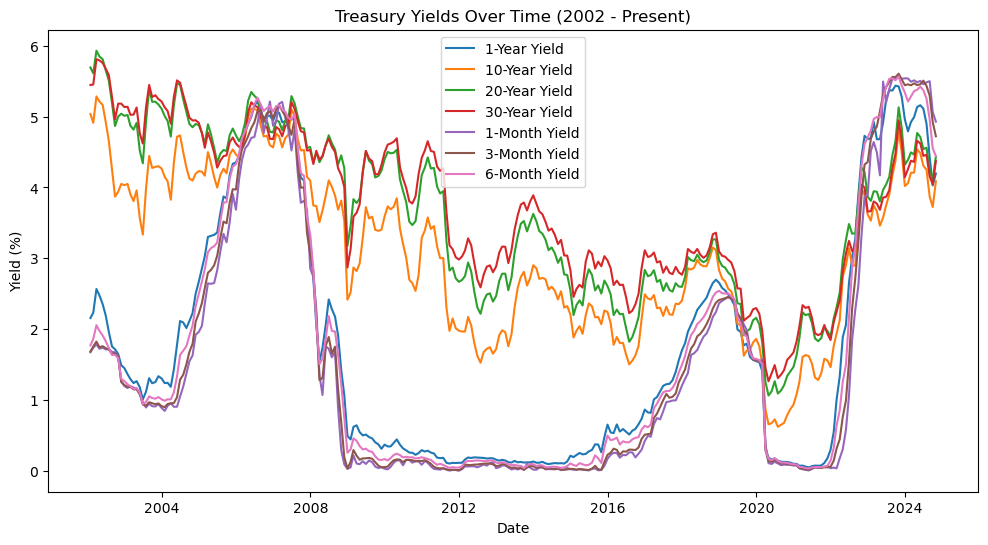

In [33]:
# Resample to monthly frequency, taking the mean of each month
yr1_monthly = yr1.resample('ME', on='DATE').mean()
yr10_monthly = yr10.resample('ME', on='DATE').mean()
yr20_monthly = yr20.resample('ME', on='DATE').mean()
yr30_monthly = yr30.resample('ME', on='DATE').mean()
mo1_monthly = mo1.resample('ME', on='DATE').mean()
mo3_monthly = mo3.resample('ME', on='DATE').mean()
mo6_monthly = mo6.resample('ME', on='DATE').mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yr1_monthly.index, yr1_monthly['DGS1'], label='1-Year Yield')
plt.plot(yr10_monthly.index, yr10_monthly['DGS10'], label='10-Year Yield')
plt.plot(yr20_monthly.index, yr20_monthly['DGS20'], label='20-Year Yield')
plt.plot(yr30_monthly.index, yr30_monthly['DGS30'], label='30-Year Yield')
plt.plot(mo1_monthly.index, mo1_monthly['DGS1MO'], label='1-Month Yield')
plt.plot(mo3_monthly.index, mo3_monthly['DGS3MO'], label='3-Month Yield')
plt.plot(mo6_monthly.index, mo6_monthly['DGS6MO'], label='6-Month Yield')

# Add labels and title
plt.title('Treasury Yields Over Time (2002 - Present)')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

#Source: ChatGPT 4.0
# Date Accessed: 11.4.2024
# Prompt: "Here is my dataframes and data labels. My code is getting a type error and I need to fix it. I am aiming to have all of the 
# yield info on one chat for display purposes."

In [34]:
yr1_quarterly = yr1.resample('QE', on='DATE').mean()
yr10_quarterly = yr10.resample('QE', on='DATE').mean()
yr20_quarterly = yr20.resample('QE', on='DATE').mean()
yr30_quarterly = yr30.resample('QE', on='DATE').mean()
mo1_quarterly = mo1.resample('QE', on='DATE').mean()
mo3_quarterly = mo3.resample('QE', on='DATE').mean()
mo6_quarterly = mo6.resample('QE', on='DATE').mean()

yr1_quarterly


,DGS1
DATE,
2002-03-31,2.318167
2002-06-30,2.346719
2002-09-30,1.814063
2002-12-31,1.53371
2003-03-31,1.300328
...,...
2023-12-31,5.225968
2024-03-31,4.9
2024-06-30,5.13619


In [35]:
full_data = pd.merge(yr1_quarterly, yr10_quarterly, on='DATE', how='outer')
full_data = pd.merge(full_data, yr20_quarterly, on='DATE', how='outer')
full_data = pd.merge(full_data, yr30_quarterly, on='DATE', how='outer')
full_data = pd.merge(full_data, mo1_quarterly, on='DATE', how='outer')
full_data = pd.merge(full_data, mo3_quarterly, on='DATE', how='outer')
full_data = pd.merge(full_data, mo6_quarterly, on='DATE', how='outer')

full_data.reset_index(inplace=True)

full_data = full_data.drop(full_data.tail(2).index)

full_data

,DATE,DGS1,DGS10,DGS20,DGS30,DGS1MO,DGS3MO,DGS6MO
0,2002-03-31,2.318167,5.079167,5.744667,5.568333,1.731833,1.754333,1.8955
1,2002-06-30,2.346719,5.106094,5.77375,5.744062,1.726562,1.74625,1.908594
2,2002-09-30,1.814063,4.272344,5.198906,5.284375,1.691406,1.67375,1.671719
3,2002-12-31,1.53371,4.004839,5.015645,5.165484,1.367581,1.365968,1.391129
4,2003-03-31,1.300328,3.92,4.90377,5.064426,1.180164,1.174754,1.191148
...,...,...,...,...,...,...,...,...
85,2023-06-30,4.94873,3.595714,3.93873,3.805238,4.975714,5.269524,5.230635
86,2023-09-30,5.39,4.149683,4.421429,4.239365,5.485714,5.535556,5.528095
87,2023-12-31,5.225968,4.447097,4.771129,4.590806,5.548387,5.524516,5.449194
88,2024-03-31,4.9,4.156393,4.447705,4.330492,5.513279,5.454262,5.283115


In [36]:
# Add yield curve columns
full_data['Yield_Curve_6MO_3MO'] = full_data['DGS6MO'] - full_data['DGS3MO']
full_data['Yield_Curve_30Y_20Y'] = full_data['DGS30'] - full_data['DGS20']
full_data['Yield_Curve_20Y_10Y'] = full_data['DGS20'] - full_data['DGS10']
full_data['Yield_Curve_3MO_1MO'] = full_data['DGS3MO'] - full_data['DGS1MO']
full_data['Yield_Curve_10Y_1Y'] = full_data['DGS10'] - full_data['DGS1']
full_data['Yield_Curve_10Y_3MO'] = full_data['DGS10'] - full_data['DGS3MO']



# Calculate the percentage change in GDP to determine quarterly growth rates,
# then classify growth as either -1 (negative growth) or 2 (positive growth).


gdp_data['GDP_growth'] = gdp_data['GDP'].pct_change() * 100
for idx, value in gdp_data['GDP_growth'].items():
    if value < 0:
        gdp_data.at[idx, 'GDP_growth'] = -1
    else:
        gdp_data.at[idx, 'GDP_growth'] = 2


With the code above, we are beginning to calculate the various yield spreads as well as indicating the data to be negative or postive growth. We are looking at various examples of potential spreads. 

From further anaylsis into the topic, longer treasury yield spreads are determined by the market which means traders are buying/selling treasury bonds causing an effect on the the yield. 

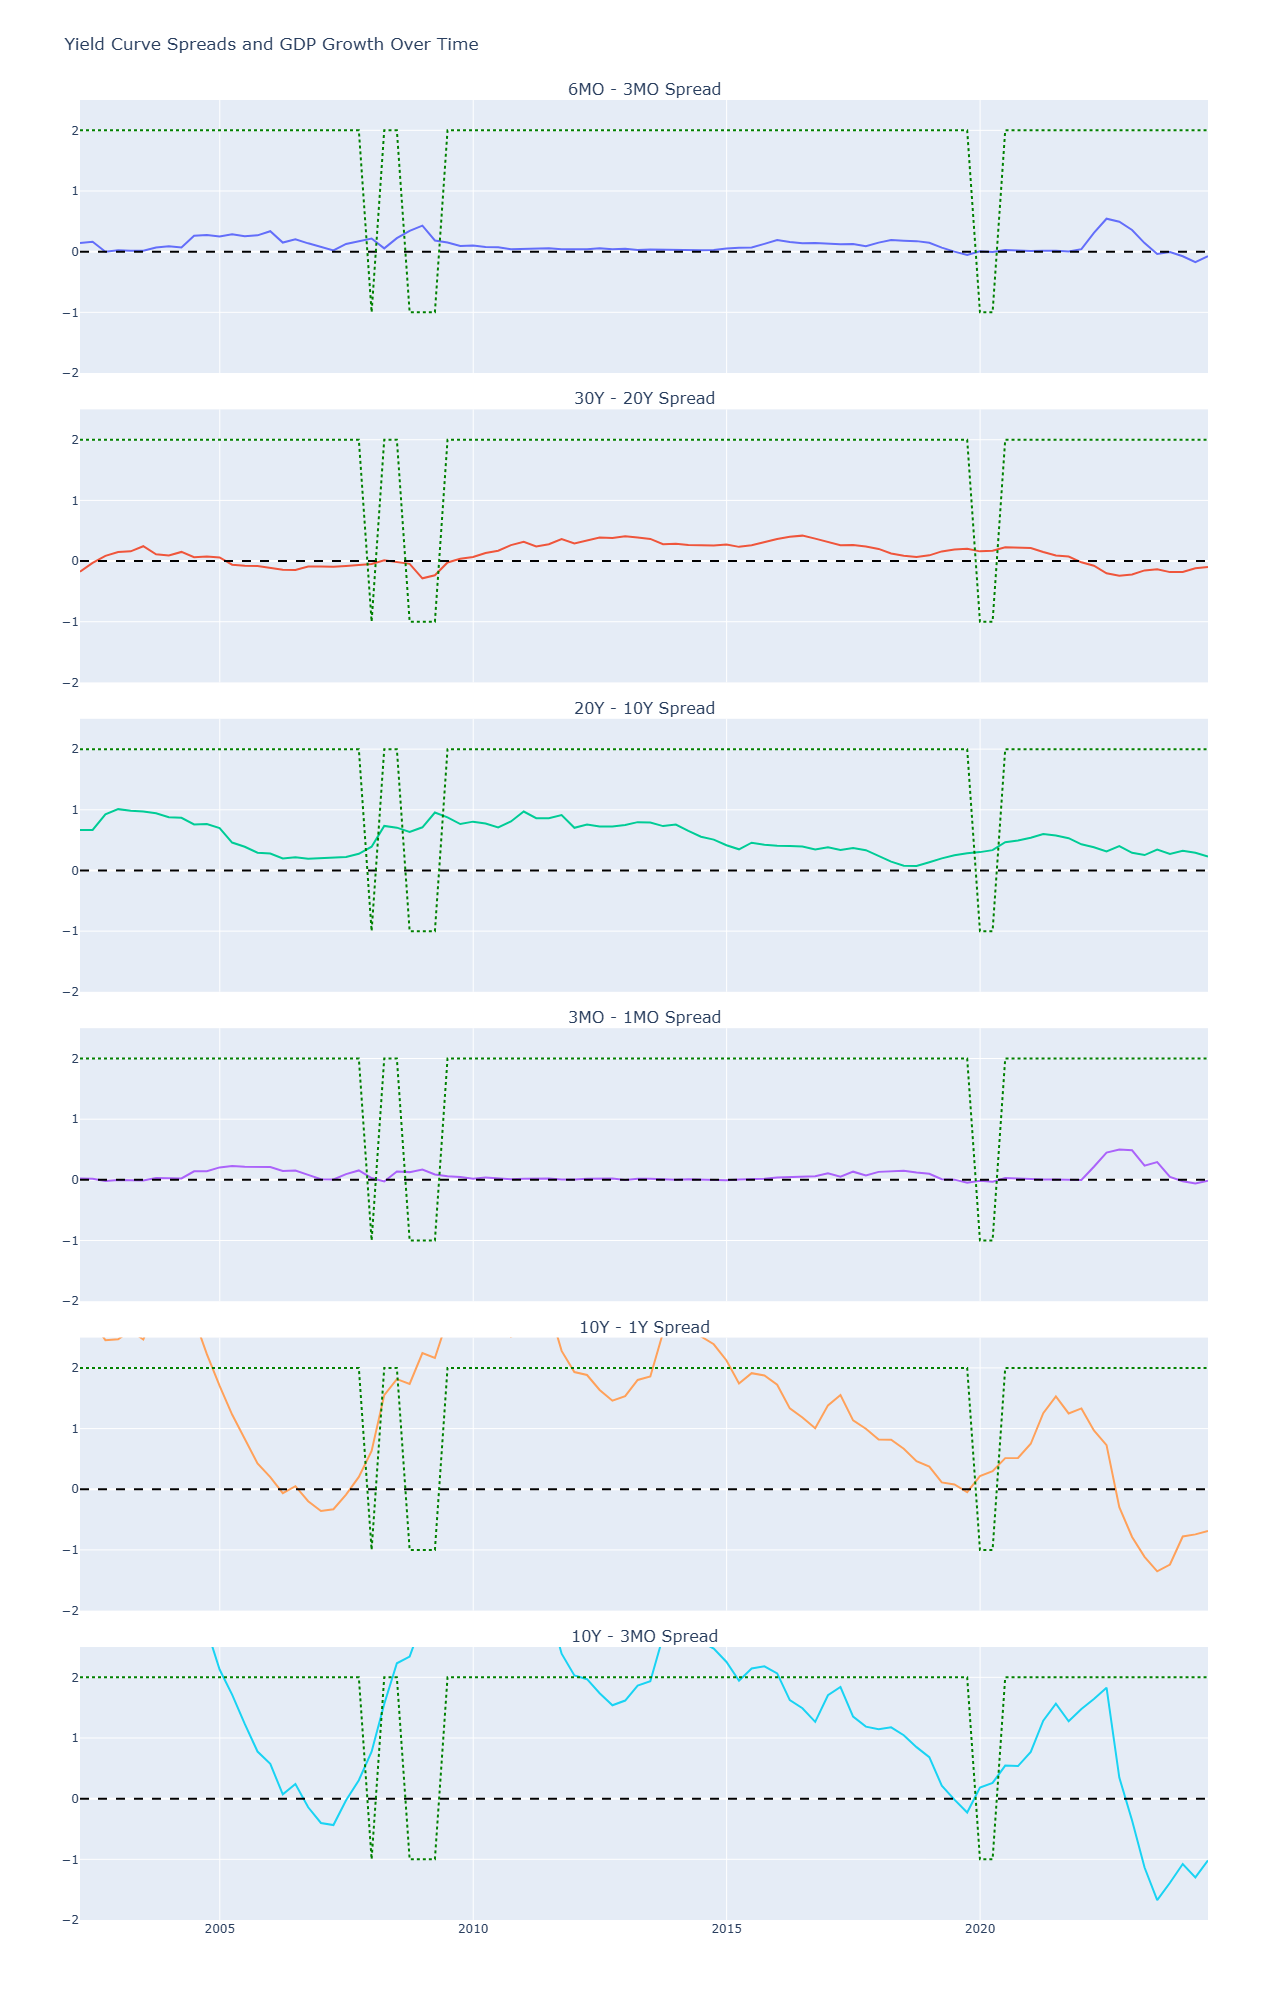

In [37]:
# Create subplots: 5 rows, 1 column
fig_spreads = make_subplots(
    rows=6, cols=1, 
    shared_xaxes=True,  
    vertical_spacing=0.02,  
    subplot_titles=[
        "6MO - 3MO Spread", 
        "30Y - 20Y Spread", 
        "20Y - 10Y Spread", 
        "3MO - 1MO Spread", 
        "10Y - 1Y Spread",
        "10Y - 3MO Spread"
    ]
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_6MO_3MO'], mode='lines', name='6MO - 3MO Spread'),
    row = 1, col = 1
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_30Y_20Y'], mode='lines', name='30Y - 20Y Spread'),
    row=2, col=1
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_20Y_10Y'], mode='lines', name='20Y - 10Y Spread'),
    row=3, col=1
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_3MO_1MO'], mode='lines', name='3MO - 1MO Spread'),
    row=4, col=1
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_10Y_1Y'], mode='lines', name='10Y-1Y Spread'),
    row=5, col=1
)

fig_spreads.add_trace(
    go.Scatter(x=full_data['DATE'], y=full_data['Yield_Curve_10Y_3MO'], mode='lines', name='10Y-3MO Spread'),
    row=6,col=1
)

for i in range(1, 7):  
    fig_spreads.add_trace(
        go.Scatter(x=full_data['DATE'], y=[0] * len(full_data), mode='lines', name='Zero Line', line=dict(dash='dash', color='black')),
        row=i, col=1)
    fig_spreads.add_trace(
        go.Scatter(x=gdp_data['DATE'], y=gdp_data['GDP_growth'], mode='lines', line=dict(color='green', dash='dot')),
        row=i, col=1)
    fig_spreads.update_yaxes(
        range=[-2,2.5],  
        row=i, col=1)


fig_spreads.update_layout(
    title="Yield Curve Spreads and GDP Growth Over Time",
    height=2000, 
    width=1000,   
    showlegend=False  
)

fig_spreads.show()

The yield curve spreads shown in this plot have gone through some interesting fluctuations over the past 15 years. Looking at both the 10Y-1Y and 10Y-3MO spreads, I can see an overall trend of the curve flattening over time, as the gap between long-term and short-term interest rates has narrowed. There were a couple of instances, like around 2007-2008 and again in 2019-2020, where the spreads even turned negative, signaling an inverted yield curve which can be an early indicator of a potential recession.

The 10 year - 3 month spread is showing to be the largest indicator of a potential recession as there seems to be a greater correlation between the negative spreads for this data and the a potential recession. The 10 year - 1 year is also a good indicator but does not seem to have as large of a correlation as the 10Y - 3 MO

The sharp drop in both spreads in 2020 was clearly a response to the Fed lowering rates aggressively to support the economy during the COVID-19 pandemic. 

# Reasoning Behind the Yield Curve

Naturally, as investors look to place their money, there are a few aspects of the market they will look at. Profits, Risk, and Liquidity. The main focus behind treasury yields are the idea of liquidity. If you were to invest your own money, would you rather have it held up for 10 years or 3 months if you are getting the same return? 3 months! When the yield spread = 0, that means between bonds are returning the same amount of money. It does not make too much sense right? That is because there is something wrong in the markets

When the short term treasury bonds (3 months) are high, that can mean there is optimism in the current markets, and when the long term treasury bonds are low, that can indicate there is uncertainity about the future. This is normally seen as an inverted yield curve

### Inverted Yield Curve

As you can see from above the yield curve is inverted during both instances of negative US GDP growth which is considered a recession. As the yield curve begins to go back to normal, this can mean the 3 month bond yield is decreasing and/or the 10 year bond yield is increasing. Often times, both are the case. The logic on why this is a predictor of a potential recession is because as money is pulled out of the 3 month yield curve, this means that investors do not have confidence in the short-term and the federal reseve is decreasing interest rate to stimulate the economy. Both are negative signs towards our economy as it is a large signal for an economic recession.

From our analysis, you can see that that theory holds true.

For more information on this topic: https://www.investopedia.com/terms/i/invertedyieldcurve.asp 
This is where we are gathering our information about this topic from. 


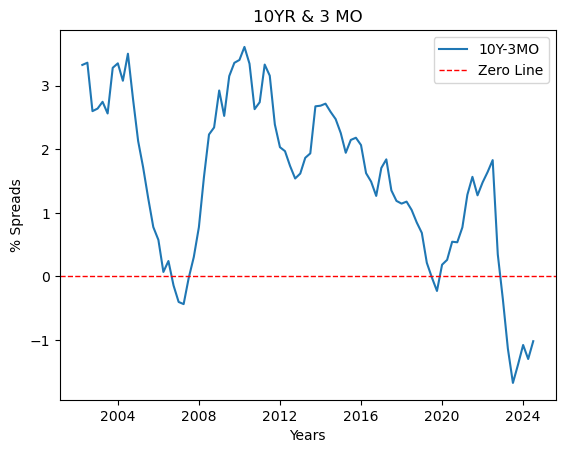

In [38]:
plt.plot(full_data['DATE'], full_data['Yield_Curve_10Y_3MO'], label='10Y-3MO')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label="Zero Line")
plt.xlabel("Years")
plt.ylabel("% Spreads")
plt.legend()
plt.title("10YR & 3 MO")
plt.show()
         

         DATE  GDP_growth Yield_Curve_10Y_3MO  Yield_Curve_10Y_3MO_adjusted
0  2002-03-31         2.0            3.324833                             2
1  2002-06-30         2.0            3.359844                             2
2  2002-09-30         2.0            2.598594                             2
3  2002-12-31         2.0            2.638871                             2
4  2003-03-31         2.0            2.745246                             2
..        ...         ...                 ...                           ...
85 2023-06-30         2.0            -1.67381                            -1
86 2023-09-30         2.0           -1.385873                            -1
87 2023-12-31         2.0           -1.077419                            -1
88 2024-03-31         2.0           -1.297869                            -1
89 2024-06-30         2.0           -1.017778                            -1

[90 rows x 4 columns]


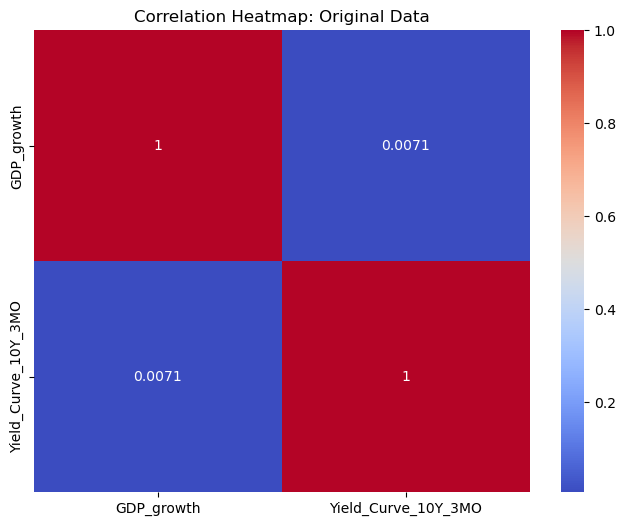

In [39]:
import seaborn as sns
merging_spread = full_data["Yield_Curve_10Y_3MO"]
merging_growth = gdp_data['GDP_growth']

merged_data = pd.merge(gdp_data[['DATE', 'GDP_growth']], full_data[['DATE', 'Yield_Curve_10Y_3MO']], on='DATE', how='inner')
merged_data['Yield_Curve_10Y_3MO_adjusted'] = merged_data['Yield_Curve_10Y_3MO'].apply(lambda x: 2 if x > 0 else -1)
print(merged_data)
correlation_original = merged_data[['GDP_growth', 'Yield_Curve_10Y_3MO']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_original, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Original Data')
plt.show()

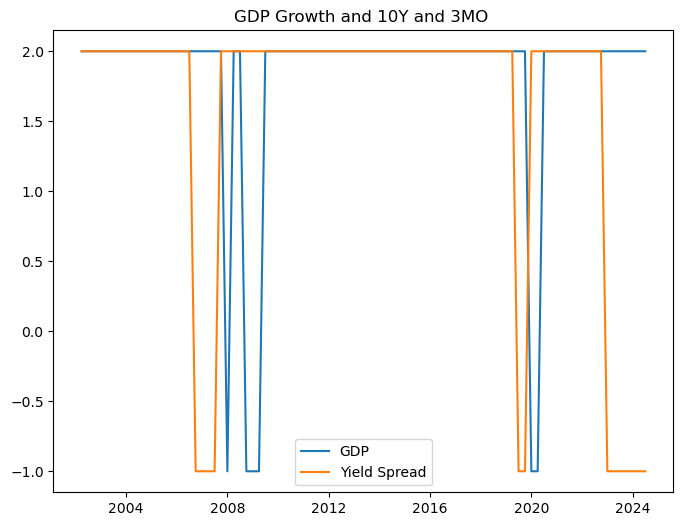

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(gdp_data['DATE'], gdp_data['GDP_growth'], label = "GDP")
plt.plot(merged_data['DATE'], merged_data['Yield_Curve_10Y_3MO_adjusted'], label = "Yield Spread")

plt.title('GDP Growth and 10Y and 3MO ')
plt.legend()
plt.show()

This graph shows GDP and the 10Y - 3MO yield spread where positive values = 2 and negative values = -1. The reason we are looking specifically at the value is to find a better correlation as the actually numerical value does not do us any good. We only care about the postive/negative and from the chart you can see that the yield spread is always negative before an economic downturn. The most interesting part is that our yield spread is currently negative...

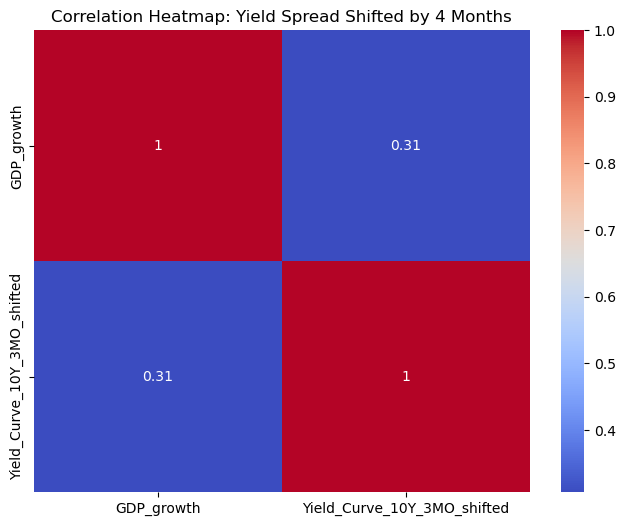

In [45]:
merged_data_shifted = merged_data.copy()
merged_data_shifted['Yield_Curve_10Y_3MO_shifted'] = merged_data_shifted['Yield_Curve_10Y_3MO_adjusted'].shift(2)

merged_data_shifted = merged_data_shifted.dropna()

correlation_shifted = merged_data_shifted[['GDP_growth', 'Yield_Curve_10Y_3MO_shifted']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_shifted, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Yield Spread Shifted by 4 Months')
plt.show()

The correlation map above shows the correlation between the yield spread and the gdp growth. While not extremely high, this is still a strong indicator because there are multiple factors that go into spreads which can cause them to skew the data. The graph above shows a better depiction on this correlation. 

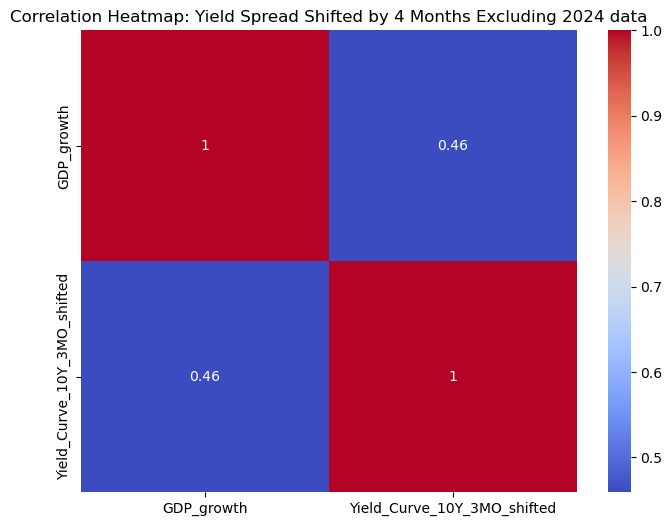

,DATE,GDP_growth,Yield_Curve_10Y_3MO,Yield_Curve_10Y_3MO_adjusted,Yield_Curve_10Y_3MO_shifted
77,2021-06-30,2.0,1.565625,2,2.0
78,2021-09-30,2.0,1.275156,2,2.0
79,2021-12-31,2.0,1.479194,2,2.0
80,2022-03-31,2.0,1.641774,2,2.0
81,2022-06-30,2.0,1.828871,2,2.0


In [53]:
merged_data_shifted.tail(10)
merged_data_dropped = merged_data_shifted.iloc[:-8]

correlation_dropped = merged_data_dropped[['GDP_growth', 'Yield_Curve_10Y_3MO_shifted']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_dropped, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Yield Spread Shifted by 4 Months Excluding 2024 data')
plt.show()

merged_data_dropped.tail(5)

This is the same correlation map but with removing the 2024 data. This is because the current yield curve is negative due to the Federal Reserve hiking interest rates causing short-term borrowings to increase creating the inversion. From the original correlation map to the adjusted one, the correlation increased 10 times indicating a relationship


## Predicting the Next Recession

Now that we have gathered enough data and shown our analysis to prove the accuracy of the 10 year and 3 month yield, we will be using forecasted data to see if we can time the next recession 

The data that we are using will be SOFR Future Rates. These are rates that traders are predicting where yield curves will be in the future. 

,Date,10 Year,3-month Term SOFR
0,19-Nov-24,0.044394,0.045191
1,19-Dec-24,0.044407,0.044443
2,21-Jan-25,0.044433,0.043562
3,19-Feb-25,0.044466,0.042825
4,19-Mar-25,0.044505,0.042147
5,21-Apr-25,0.044528,0.041310
6,19-May-25,0.044556,0.040806
7,20-Jun-25,0.044598,0.040319
8,21-Jul-25,0.044658,0.040007
9,19-Aug-25,0.044720,0.039701


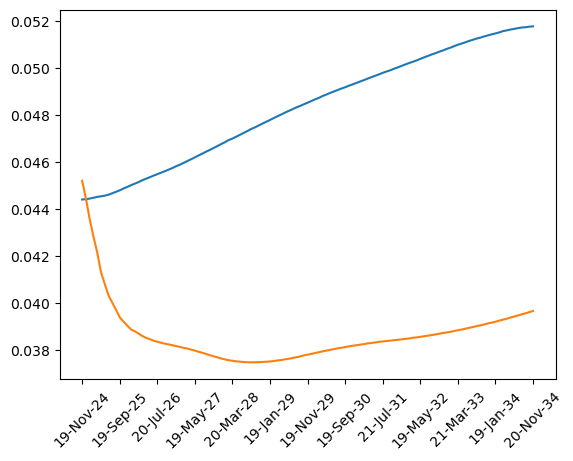

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
forward = pd.read_csv('data/foward_curve.csv')
date = forward['Date']
treasury_10Y = forward['10 Year']
treasury_3MO = forward['3-month Term SOFR']
forward.head()
num_rows = forward.shape[0]
plt.xticks(rotation=45)
plt.plot(date, treasury_10Y)
plt.plot(date, treasury_3MO)
plt.xticks(range(0, num_rows, 10))

forward.head(10)